# Exploratory Data Analysis :

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [59]:
# load and read the dataset
df = pd.read_csv("brain_tumor_dataset.csv")
df

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No


## In this dataset there are 20000 rows and 19 columns.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

## Show the Index Information , Column Details , Non-Null Count , Dtype summary and Memory Usage.

In [67]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Location',
       'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
       'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result',
       'Follow_Up_Required'],
      dtype='object')

## Show all columns name.

In [71]:
#statistical description
df.describe()

,Patient_ID,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,49.433700,5.236552,70.131699,1.547701
std,5773.647028,17.389296,2.754359,17.270834,0.835995
min,1.000000,20.000000,0.500410,40.002386,0.100017
25%,5000.750000,34.000000,2.836686,55.224439,0.830433
50%,10000.500000,49.000000,5.200675,70.305066,1.541821
75%,15000.250000,65.000000,7.624299,85.043395,2.262484
max,20000.000000,79.000000,9.999420,99.998125,2.999835


## Show statical description of this dataset.(Numerical columns)

In [75]:
df.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

## Show null values.(There are no null value in this dataset)

In [79]:
df.duplicated().sum()

0

# Age :  

In [82]:
df['Age'].mean()

49.4337

In [84]:
df['Age'].mode()

0    31
Name: Age, dtype: int64

### Histogram Plot : 

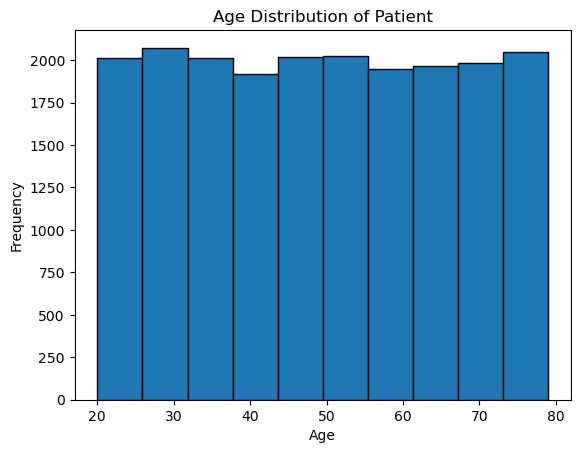

In [87]:
df['Age'].plot(kind = "hist", edgecolor = "black")
plt.title("Age Distribution of Patient")
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()


## Displays the frequency distribution of ages.

# Gender : 

In [329]:
df['Gender'].value_counts()

Gender
Female    10016
Male       9984
Name: count, dtype: int64

In [331]:
df.groupby('Gender')['Age'].mean()

Gender
Female    49.361422
Male      49.506210
Name: Age, dtype: float64

### Bar Plot : 

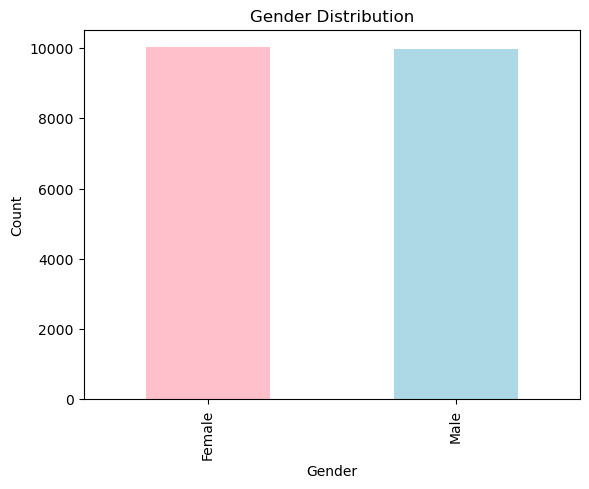

In [334]:
df['Gender'].value_counts().plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


## Count of gender (the female count is higher as compaired to male)

# Tumor Type : 

In [337]:
df['Tumor_Type'].unique()

array(['Malignant', 'Benign'], dtype=object)

### Pie Plot : 

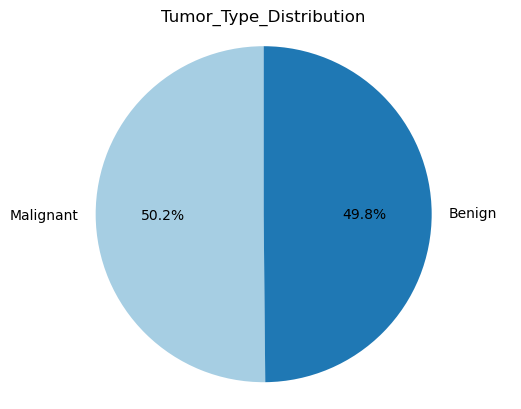

In [373]:
tumor_counts = df['Tumor_Type'].value_counts()

plt.pie(tumor_counts, labels = tumor_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Tumor_Type_Distribution')
plt.axis('equal')
plt.show()

## Shows the proportion of different Tumor_Type conditions in the dataset.(the Tumor_Type count of Malignant is higher as compaired to count of Benign)

# Location : 

In [343]:
df['Location'].unique()

array(['Temporal', 'Parietal', 'Frontal', 'Occipital'], dtype=object)

In [346]:
location_counts = df['Location'].value_counts()
print(location_counts)

Location
Temporal     5118
Parietal     4990
Occipital    4967
Frontal      4925
Name: count, dtype: int64


### Bar Plot : 

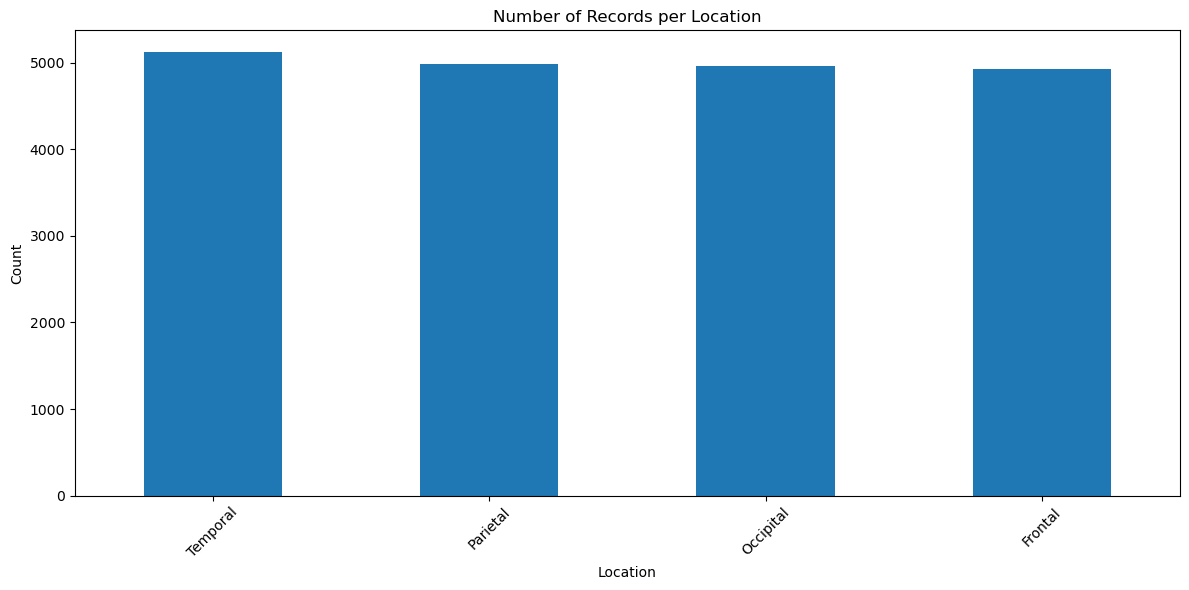

In [349]:
df['Location'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Number of Records per Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## This bar chart provides a clear visual representation of the data distribution across location. (the highest count location is Temporal and lowest count location is Frontal)

# Stage :

In [285]:
df['Stage'].unique()

array(['III', 'II', 'I', 'IV'], dtype=object)

In [359]:
stage_counts = df['Stage'].value_counts()
print(stage_counts)

Stage
II     5093
I      4986
IV     4968
III    4953
Name: count, dtype: int64


### Pie plot : 

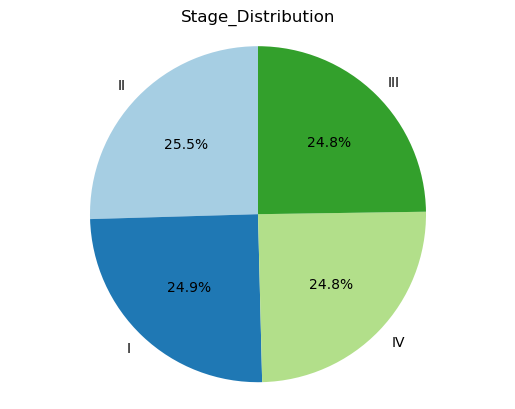

In [369]:
stage_counts = df['Stage'].value_counts()

plt.pie(stage_counts, labels = stage_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Stage_Distribution')
plt.axis('equal')
plt.show()

## Show the percentage wise count of stage. (In this graph show the highest percentage is stage 2 i.e is 25.5%)

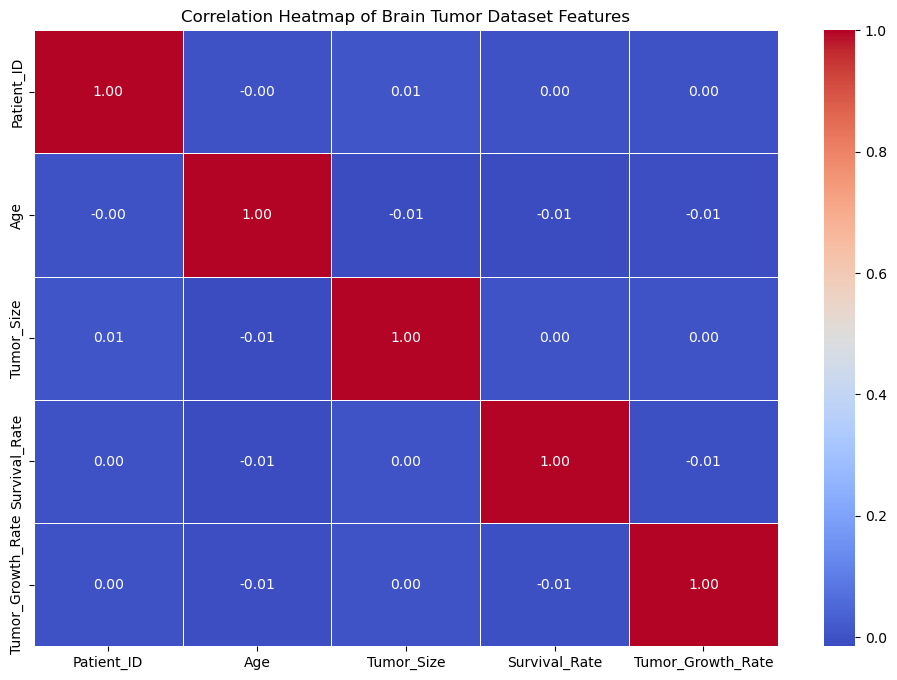

In [42]:
# Load the dataset
df = pd.read_csv('brain_tumor_dataset.csv') 

# Drop non-numeric columns for correlation heatmap (e.g., ID, filename)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = df_numeric.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Brain Tumor Dataset Features')
plt.show()

## Show corelation between Patient_ID, Age, Tumor_Size, Survival_Rate and Tumor_Growth_Rate 

In [36]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to multiple columns
for col in ["Gender", "Location", "Histology", "Symptom_1", "Symptom_2", "Symptom_3", "Radiation_Treatment", "Surgery_Performed", "Chemotherapy", "Family_History", "Stage", "MRI_Result", "Follow_Up_Required"]:
    df[col] = encoder.fit_transform(df[col])

df

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,1,Malignant,5.375612,3,0,2,3,2,2,0,0,0,51.312579,0.111876,0,1,1
1,2,26,1,Benign,4.847098,2,1,1,0,0,1,1,1,1,46.373273,2.165736,1,1,1
2,3,31,1,Benign,5.588391,2,3,0,3,0,2,0,0,0,47.072221,1.884228,0,0,0
3,4,29,1,Malignant,1.436600,3,2,3,3,2,0,1,0,1,51.853634,1.283342,1,0,0
4,5,54,0,Benign,2.417506,2,1,0,0,0,2,0,0,1,54.708987,2.069477,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,1,Malignant,9.612013,2,2,2,2,1,3,0,0,1,58.229662,0.353806,0,0,1
19996,19997,32,0,Benign,1.543560,3,3,2,0,0,3,1,1,0,77.706856,2.341074,0,1,0
19997,19998,57,0,Benign,3.618634,3,2,0,2,3,1,0,0,1,89.543803,2.332881,0,1,1
19998,19999,68,1,Malignant,8.519086,2,1,2,2,0,3,1,1,1,83.306781,2.387202,0,1,0


In [14]:
df['Symptom_1'].median()

1.0

In [16]:
df['Symptom_2'].median()

2.0

In [18]:
df['Symptom_3'].median()

2.0

### Box Plot :

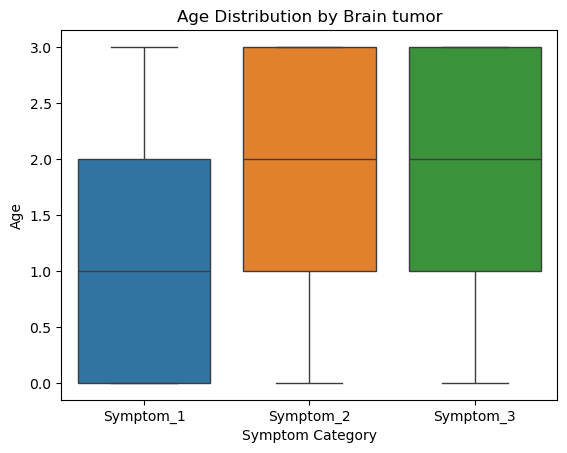

In [281]:
sns.boxplot(data = df [['Symptom_1', 'Symptom_2', 'Symptom_3']])
plt.title('Age Distribution by Brain tumor')
plt.xlabel('Symptom Category')
plt.ylabel('Age')
plt.show()